In [1]:
"""
该代码用于绘制AD-Alterome和DISEASES/KEGG/Uniport数据库的基因重叠柱状图

可以考虑加入AlzGene

原来收集的DISEASES/KEGG/Uniport数据已经搞丢了 重叠柱状图只画数字


only-Alterome / overlap / only-db
DISEASES-occurrence 1447/5384/5138
DISEASES-stric 6513/318/47
Uniprot 6619/212/71
KEGG 6566/265/118



"""

'\n该代码用于绘制AD-Alterome和DISEASES/KEGG/Uniport数据库的基因重叠柱状图\n\n可以考虑加入AlzGene\n\n原来收集的DISEASES/KEGG/Uniport数据已经搞丢了 重叠柱状图只画数字\n\n\nonly-Alterome / overlap / only-db\nDISEASES-occurrence 1447/5384/5138\nDISEASES-stric 6513/318/47\nUniprot 6619/212/71\nKEGG 6566/265/118\n\n\n\n'

In [2]:
"""
AD-Alterome总过覆盖7902个基因

覆盖情况

    Only-Alterome Only-DB Overlap 
AlzGene 7341 513 680
DISEASES-occurrence 


"""

'\nAD-Alterome总过覆盖7902个基因\n\n覆盖情况\n\n    Only-Alterome Only-DB Overlap \nAlzGene 7341 513 680\nDISEASES-occurrence \n\n\n'

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
1447+5384+5138

11969

In [5]:
def covert_count(count_str: str, new_alterome_total: int):
    # count_str: only_alterome/overlap/only_db
    only_alterome, overlap, only_db = map(int, count_str.split('/'))

    db_total = overlap + only_db
    alterome_total = only_alterome + overlap

    new_overlap = int(overlap/alterome_total*new_alterome_total)
   
    new_only_alterome = new_alterome_total - new_overlap
    
    #new_only_db = db_total - new_overlap
    new_only_db = int(only_db * new_overlap/overlap)
    
    print(f'only-alterome: {new_only_alterome}, overlap: {new_overlap}, only-db: {new_only_db}')
    return new_only_alterome, new_overlap, new_only_db

In [6]:
# DISEASES co-occurrence
_ = covert_count('1447/5384/5138', 8791)

only-alterome: 1863, overlap: 6928, only-db: 6611


In [7]:
# DISEASES Strict
_ = covert_count('6513/318/47', 7902)

only-alterome: 7535, overlap: 367, only-db: 54


In [8]:
# Uniport
_ = covert_count('6619/212/71', 8791)


only-alterome: 8519, overlap: 272, only-db: 91


In [9]:
# KEGG
_ = covert_count('6566/265/118', 8791)

only-alterome: 8450, overlap: 341, only-db: 151


In [10]:
# AlzGene 8247, 544, 136

/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization/Gene-coverage.bar.png saved.


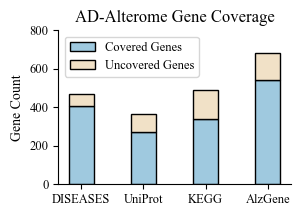

In [55]:

fig_save_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization'
fig_save_file = f'{fig_save_path}/Gene-coverage.bar.png'


black = '#000000'
gray = '#FFFFFF'
white = '#A9A9A9'

color_1 = '#9FC9DF'
color_2 = '#F1E1C7'

color_3 = '#495373'
color_4 = '#8CA5EA'

color_5 = '#999A9E'
color_6 = '#8A7196'

# 数据
categories = ['DISEASES', 'UniProt', 'KEGG', 'AlzGene']
values1 = [ 409, 272, 341, 544]
values2 = [ 60, 91, 151, 136]
#values3 = [ 0, 0, 0, 0 ]

bar_width = 0.4  # 柱子的宽度

# 设置柱子的X位置
bar_positions = np.arange(len(categories))

# 创建堆叠柱状图
fig, ax = plt.subplots(figsize=(3,2))

# 绘制每个部分的柱子
bar1 = ax.bar(bar_positions, values1, bar_width, label='Covered Genes',
              color=color_1, edgecolor='black')
bar2 = ax.bar(bar_positions, values2, bar_width, bottom=values1,
              label='Uncovered Genes', color=color_2, edgecolor='black')
#bar3 = ax.bar(bar_positions, values3, bar_width, bottom=np.array(values1) + np.array(values2), label='Category 3', color='g')

plt.yticks([0, 200, 400, 600, 800],
           fontsize=9, fontname='Times New Roman')
plt.xticks(bar_positions, fontsize=9, fontname='Times New Roman')

# 添加标签和标题
#ax.set_xlabel('Categories')
ax.set_ylabel('Gene Count', fontname='Times New Roman', fontsize=10)
ax.set_title('AD-Alterome Gene Coverage', fontsize=12, fontname='Times New Roman')
ax.set_xticklabels(categories, fontname='Times New Roman', fontsize=9)
#ax.legend()
legend = ax.legend(prop={'family': 'Times New Roman', 'size': 9})


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig(fig_save_file, dpi=360)
print(f'{fig_save_file} saved.')

# 显示图形
plt.show()

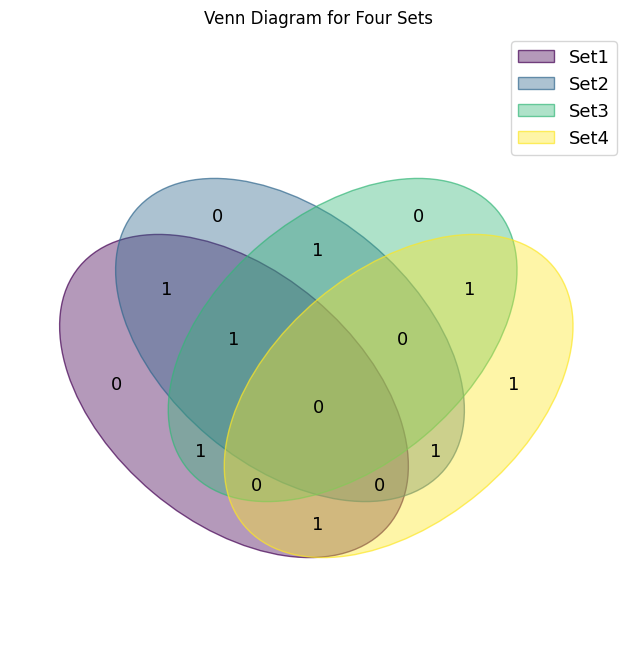